# Markov Graph Generation

In [5]:
import firebase_admin
from firebase_admin import credentials, firestore
from markov import get_records_by_email, get_all_records, get_record_by_id, create_nested_tables

In [6]:
# Fetch the service account key JSON file contents
cred = credentials.Certificate('secrets/firebase_service_credentials.json')
firebase_admin.initialize_app(cred)

In [3]:
# Reference Firestore
db = firestore.client()

# Access a collection (e.g., 'userData')
docs = db.collection('userData').stream()

In [13]:
import pandas as pd

In [14]:
documents = get_all_records(db)

In [15]:
documents

[{'documents': [{'createdAt': '2025-04-02T21:17:30.638Z',
    'type': 'Interaction',
    'metadata': {'name': 'Video'},
    'url': 'https://www.youtube.com/',
    'sourceState': '/'},
   {'createdAt': '2025-04-02T21:17:30.648Z',
    'type': 'Self-Loop',
    'metadata': {'urlChange': False},
    'url': 'https://www.youtube.com/',
    'sourceState': '/'},
   {'createdAt': '2025-04-02T21:17:30.652Z',
    'type': 'State Change',
    'metadata': {'destinationState': '/watch'},
    'url': 'https://www.youtube.com/watch?v=rYyjY-A7kE0',
    'sourceState': '/'}],
  'sessionInfo': {'email': 'jikaelgagnon@gmail.com',
   'url': 'https://www.youtube.com/'}},
 {'documents': [{'createdAt': '2025-04-02T21:19:24.165Z',
    'type': 'Interaction',
    'metadata': {'name': 'Video'},
    'url': 'https://www.youtube.com/',
    'sourceState': '/'},
   {'createdAt': '2025-04-02T21:19:24.171Z',
    'type': 'Self-Loop',
    'metadata': {'urlChange': False},
    'url': 'https://www.youtube.com/',
    'sourceStat

In [22]:
documents[0]['documents'], documents[0]['sessionInfo']

([{'createdAt': '2025-04-02T21:17:30.638Z',
   'type': 'Interaction',
   'metadata': {'name': 'Video'},
   'url': 'https://www.youtube.com/',
   'sourceState': '/'},
  {'createdAt': '2025-04-02T21:17:30.648Z',
   'type': 'Self-Loop',
   'metadata': {'urlChange': False},
   'url': 'https://www.youtube.com/',
   'sourceState': '/'},
  {'createdAt': '2025-04-02T21:17:30.652Z',
   'type': 'State Change',
   'metadata': {'destinationState': '/watch'},
   'url': 'https://www.youtube.com/watch?v=rYyjY-A7kE0',
   'sourceState': '/'}],
 {'email': 'jikaelgagnon@gmail.com', 'url': 'https://www.youtube.com/'})

In [25]:
documents[0]

{'documents': [{'createdAt': '2025-04-02T21:17:30.638Z',
   'type': 'Interaction',
   'metadata': {'name': 'Video'},
   'url': 'https://www.youtube.com/',
   'sourceState': '/'},
  {'createdAt': '2025-04-02T21:17:30.648Z',
   'type': 'Self-Loop',
   'metadata': {'urlChange': False},
   'url': 'https://www.youtube.com/',
   'sourceState': '/'},
  {'createdAt': '2025-04-02T21:17:30.652Z',
   'type': 'State Change',
   'metadata': {'destinationState': '/watch'},
   'url': 'https://www.youtube.com/watch?v=rYyjY-A7kE0',
   'sourceState': '/'}],
 'sessionInfo': {'email': 'jikaelgagnon@gmail.com',
  'url': 'https://www.youtube.com/'}}

In [28]:
[d['sessionInfo'] for d in documents]

[{'email': 'jikaelgagnon@gmail.com', 'url': 'https://www.youtube.com/'},
 {'email': 'gagnonjikael@gmail.com', 'url': 'https://www.youtube.com/'},
 {'email': 'jikaelgagnon@gmail.com', 'url': 'https://www.youtube.com/'},
 {'email': 'gagnonjikael@gmail.com', 'url': 'https://www.youtube.com/'},
 {'email': 'dylanjacques03@gmail.com', 'url': 'https://www.youtube.com/'},
 {'email': 'jikaelgagnon@gmail.com', 'url': 'https://www.youtube.com/'},
 {'email': 'gagnonjikael@gmail.com', 'url': 'https://www.youtube.com/'},
 {'email': 'jikaelgagnon@gmail.com', 'url': 'https://www.youtube.com/'},
 {'email': 'janvheusde@gmail.com', 'url': 'https://www.youtube.com/'},
 {'email': 'ella.morales2121@gmail.com', 'url': 'https://www.youtube.com/'},
 {'email': 'dylanjacques03@gmail.com', 'url': 'https://www.youtube.com/'},
 {'email': 'dylanjacques03@gmail.com',
  'url': 'https://www.youtube.com/watch?v=2B7w8mE4tmk&ab_channel=JoseLemus'},
 {'email': 'janvheusde@gmail.com', 'url': 'https://www.youtube.com/'}]

In [52]:
def get_session_info_dfs(documents: list[dict]):
    return [pd.DataFrame([doc['sessionInfo']]) for doc in documents]

def get_documents_dfs(documents: list[dict]):
    return [pd.DataFrame(doc['documents']) for doc in documents]

def get_df_list(documents: list[dict]):
    return list(zip(get_session_info_dfs(documents), get_documents_dfs(documents)))

In [53]:
get_df_list(documents)

[(                    email                       url
  0  jikaelgagnon@gmail.com  https://www.youtube.com/,
                    createdAt          type                        metadata  \
  0  2025-04-02T21:17:30.638Z   Interaction               {'name': 'Video'}   
  1  2025-04-02T21:17:30.648Z     Self-Loop            {'urlChange': False}   
  2  2025-04-02T21:17:30.652Z  State Change  {'destinationState': '/watch'}   
  
                                             url sourceState  
  0                     https://www.youtube.com/           /  
  1                     https://www.youtube.com/           /  
  2  https://www.youtube.com/watch?v=rYyjY-A7kE0           /  ),
 (                    email                       url
  0  gagnonjikael@gmail.com  https://www.youtube.com/,
                    createdAt          type                        metadata  \
  0  2025-04-02T21:19:24.165Z   Interaction               {'name': 'Video'}   
  1  2025-04-02T21:19:24.171Z     Self-Loop        

In [16]:
df = pd.DataFrame(documents)

In [31]:
import networkx as nx
G = nx.DiGraph()

In [32]:
df['createdAt'] = df['createdAt'].apply(lambda x: pd.to_datetime(x.split('GMT')[0].strip()))

In [33]:
df

,createdAt,type,metadata,url,sourceState
0,2025-04-02 19:13:38.512000+00:00,Interaction,{'name': 'YouTube Logo'},https://www.youtube.com/feed/history,/feed/history
1,2025-04-02 19:13:38.523000+00:00,Self-Loop,{'urlChange': False},https://www.youtube.com/feed/history,/feed/history
2,2025-04-02 19:13:38.531000+00:00,State Change,{'destinationState': '/'},https://www.youtube.com/,/feed/history
3,2025-04-02 19:13:42.710000+00:00,Interaction,{'name': 'Side Navigation Button'},https://www.youtube.com/,/
4,2025-04-02 19:13:43.233000+00:00,State Change,{'destinationState': '/shorts/7OO-I1zGV_0'},https://www.youtube.com/shorts/7OO-I1zGV_0,/
5,2025-04-02 19:13:45.569000+00:00,Interaction,{'name': 'Side Navigation Button'},https://www.youtube.com/shorts/7OO-I1zGV_0,/shorts
6,2025-04-02 19:13:45.575000+00:00,State Change,{'destinationState': '/feed'},https://www.youtube.com/feed/subscriptions,/shorts
7,2025-04-02 19:13:48.840000+00:00,Interaction,{'name': 'Side Navigation Button'},https://www.youtube.com/feed/subscriptions,/feed/subscriptions
8,2025-04-02 19:13:48.846000+00:00,State Change,{'destinationState': '/feed/history'},https://www.youtube.com/feed/history,/feed/subscriptions
9,2025-04-02 19:13:53.833000+00:00,State Change,{'destinationState': '/results'},https://www.youtube.com/results?search_query=tf2,/feed/history


In [34]:
states = df.sourceState.unique()
states

array(['/feed/history', '/', '/shorts', '/feed/subscriptions', '/results'],
      dtype=object)

In [35]:
df_deduplicated = df.loc[df['sourceState'].shift() != df['sourceState']]

# Reset the index if needed
df_deduplicated = df_deduplicated.reset_index(drop=True)

# Display or save the result
print(list(df_deduplicated.sourceState))
connections = list(df_deduplicated.sourceState)

['/feed/history', '/', '/shorts', '/feed/subscriptions', '/feed/history', '/results']


In [36]:
G.add_nodes_from(states)

In [37]:
G.nodes

NodeView(('/feed/history', '/', '/shorts', '/feed/subscriptions', '/results'))

In [38]:
edges = []
for i in range(1, len(connections)):
    edges.append((connections[i-1], connections[i]))

In [39]:
edges

[('/feed/history', '/'),
 ('/', '/shorts'),
 ('/shorts', '/feed/subscriptions'),
 ('/feed/subscriptions', '/feed/history'),
 ('/feed/history', '/results')]

In [40]:
G.add_edges_from(edges)

In [41]:
G.edges

OutEdgeView([('/feed/history', '/'), ('/feed/history', '/results'), ('/', '/shorts'), ('/shorts', '/feed/subscriptions'), ('/feed/subscriptions', '/feed/history')])

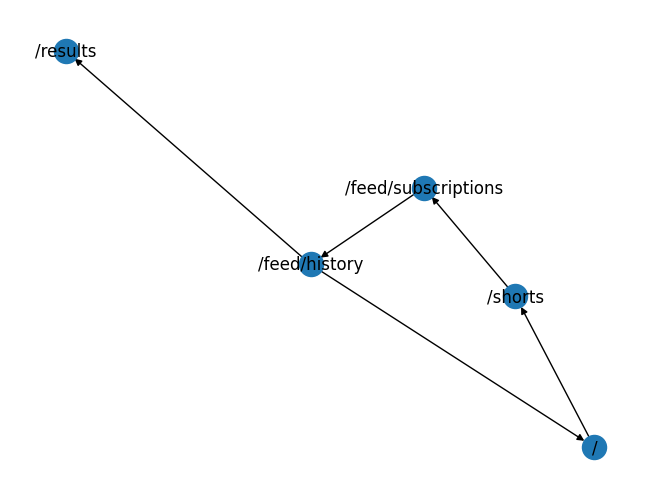

In [42]:
nx.draw(G, with_labels=True)